# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Lazzari

Student name: Andrea
    
ID: 2045247

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd                 #to return easily results

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)

ID = 2045247
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')

# rescale the data

X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
labels_test, freqs_test = np.unique(y_test, return_counts=True)

print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

print("\nLabels in test dataset: ", labels_test)
print("Frequencies in test dataset: ", freqs_test)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [52 68 70 72 63 57 50 52 52 64]

Labels in test dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test dataset:  [410 412 409 424 388 417 382 363 387 408]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("\nINPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return


INPUT:


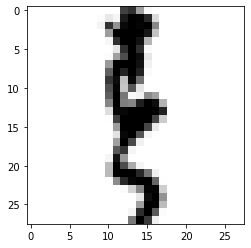

LABEL: 2

INPUT:


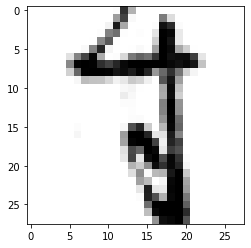

LABEL: 2

INPUT:


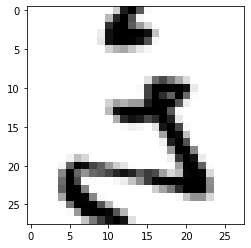

LABEL: 1

INPUT:


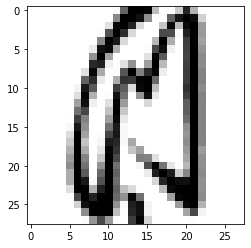

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC

#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

svc = SVC(kernel="linear")  #set Linear Kernel
clf = GridSearchCV(svc, parameters, cv=4)

clf.fit(X_train , y_train)

print ('RESULTS FOR LINEAR KERNEL')
clf_res = ( pd.DataFrame.from_dict(clf.cv_results_))
print(clf_res)

print("\nBest parameters set found:")
print(clf.best_params_)


print("\nScore with best parameters:")
print(clf.best_score_)


print("\nAll scores on the grid:")
print(clf_res.loc[:,["params","mean_test_score"]])

RESULTS FOR LINEAR KERNEL
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.050134      0.004579         0.014744        0.000211    0.01   
1       0.055834      0.008463         0.014701        0.002008     0.1   
2       0.053335      0.002077         0.014281        0.000719       1   
3       0.082867      0.011424         0.042668        0.008993      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.753333           0.773333           0.713333   
1   {'C': 0.1}           0.713333           0.746667           0.713333   
2     {'C': 1}           0.713333           0.746667           0.706667   
3    {'C': 10}           0.713333           0.746667           0.706667   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.746667         0.746667        0.021602                1  
1           0.740000         0.728333        0.015184                2  
2  

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

svc2 = SVC(kernel="poly", degree=2)  #set Poly degree 2 Kernel

clf2 = GridSearchCV(svc, parameters , cv=4)

clf2.fit(X_train , y_train)


print ('RESULTS FOR POLY DEGREE=2 KERNEL')
clf2_res=(pd.DataFrame.from_dict(clf2.cv_results_))
print(clf2_res)


print("\nBest parameters set found:")
print(clf2.best_params_)

print("\nScore with best parameters:")
print(clf2.best_score_)


print("\nAll scores on the grid:")
print(clf2_res.loc[:,["params","mean_test_score"]]) 

RESULTS FOR POLY DEGREE=2 KERNEL
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.107482      0.009578         0.061546        0.017838    0.01   
1       0.084486      0.013882         0.032784        0.010583    0.01   
2       0.045123      0.002069         0.016497        0.005508    0.01   
3       0.056732      0.010458         0.013951        0.002787     0.1   
4       0.078541      0.017677         0.034680        0.013585     0.1   
5       0.072490      0.010696         0.016374        0.003908     0.1   
6       0.054839      0.003031         0.017897        0.006207       1   
7       0.061020      0.006620         0.013346        0.001565       1   
8       0.049583      0.002592         0.012574        0.000500       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'gamma': 0.01}           0.753333   
1         0.1   {'C': 0.01, 'gamma': 0.1}           0.753333   
2           1     {'C': 

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 5

svc5 = SVC(kernel="poly", degree = degree)  #set Poly degree 4 Kernel

clf5 = GridSearchCV(svc, parameters , cv=4)

clf5.fit(X_train , y_train)

print ('RESULTS FOR POLY DEGREE =', degree, ' KERNEL')
clf5_res =( pd.DataFrame.from_dict(clf5.cv_results_))
print(clf5_res)

print("\nBest parameters set found:")
print(clf5.best_params_)

print("\nScore with best parameters:")
print(clf5.best_score_)


print("\nAll scores on the grid:")
print(clf5_res.loc[:,["params","mean_test_score"]])

RESULTS FOR POLY DEGREE = 5  KERNEL
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.054542      0.003266         0.021592        0.003962    0.01   
1       0.058117      0.010032         0.038439        0.008164    0.01   
2       0.072072      0.029503         0.035302        0.018016    0.01   
3       0.073129      0.020222         0.045388        0.015565     0.1   
4       0.088001      0.014044         0.040483        0.016295     0.1   
5       0.123364      0.023913         0.052671        0.011074     0.1   
6       0.066326      0.013961         0.020363        0.010354       1   
7       0.051703      0.005792         0.017496        0.007086       1   
8       0.049030      0.001696         0.014017        0.000403       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'gamma': 0.01}           0.753333   
1         0.1   {'C': 0.01, 'gamma': 0.1}           0.753333   
2           1     {'C

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

svc = SVC(kernel="rbf")  #set Radial Basis Function Kernel

clf_rbf = GridSearchCV(svc, parameters , cv=4)

clf_rbf.fit(X_train , y_train)


print ('RESULTS FOR rbf KERNEL')
clf_rbf_res =( pd.DataFrame.from_dict(clf_rbf.cv_results_))
print(clf_rbf_res)


print("\nBest parameters set found:")
print(clf_rbf.best_params_)

print("\nScore with best parameters:")
print(clf_rbf.best_score_)

print("\nAll scores on the grid:")
print(clf_rbf_res.loc[:,["params","mean_test_score"]])

RESULTS FOR rbf KERNEL
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.105457      0.022198         0.078413        0.025109     0.1   
1        0.120933      0.027323         0.084036        0.024070     0.1   
2        0.094306      0.005695         0.065446        0.009545     0.1   
3        0.116752      0.029370         0.076084        0.013869     0.1   
4        0.170972      0.066338         0.120576        0.035652       1   
5        0.178244      0.089322         0.088591        0.044039       1   
6        0.083446      0.005537         0.058087        0.016119       1   
7        0.113469      0.007534         0.087803        0.002466       1   
8        0.093766      0.022084         0.078846        0.007528      10   
9        0.081152      0.012803         0.044105        0.003176      10   
10       0.093791      0.022136         0.056254        0.017291      10   
11       0.097389      0.028446         0.053708        0.008635 

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

In [12]:
score_list=[clf.best_score_, clf2.best_score_, clf5.best_score_, clf_rbf.best_score_]

scores=np.array(score_list)
Kernels=("Linear Kernel" , "Poly degree 2" , "Poly degree 5" , "Radial Basis Function")

for i in range(4):
    print(Kernels[i], " best accuracy is --> " , scores[i])

Linear Kernel  best accuracy is -->  0.7466666666666667
Poly degree 2  best accuracy is -->  0.7466666666666667
Poly degree 5  best accuracy is -->  0.7466666666666667
Radial Basis Function  best accuracy is -->  0.7966666666666666


On this dataset I observe in general a similar behaviour between Linear and Polynomial (degree 2 and 5) kernels even if with degrees bigger than 2 the accuracy seems getting slightly worse.


The highest score on the training is reached by using the Radial Basis Function kernel and regarding to this, from now on Rbf is chosen as best Kernel on this data.

## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel="rbf" , C = 10 , gamma = 0.01 )

best_SVM.fit(X_train , y_train)

training_error = 1 - best_SVM.score(X_train , y_train)

test_error= 1 - best_SVM.score(X_test, y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.168250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [14]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


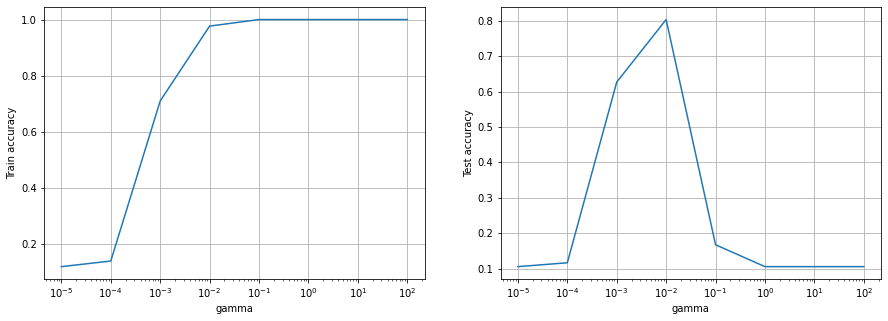

In [15]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for i in (gamma_values):

#run SVM with rbf kernel

    svc = SVC(kernel="rbf", C = 1 , gamma=i)  #set Radial Basis Function Kernel

    svc.fit(X_train , y_train)    #train

    train_acc_list.append(svc.score(X_train, y_train))    #update training accuracy list
    
    test_acc_list.append(svc.score(X_test, y_test))   #update test accuracy list
    



# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The changes of the train and test error are shown in the two previous plots.
The accuracy for the training increases as a monotonic function of gamma and the best accuracy for the test is reached with a value of gamma equals to 10^-2.

In the trainig seems to have an Overfitting issue, with rbf and a big value of lambda, the algorithm tends to classify points "strictly around them".
When there is the overfitting issue, the test accuracy decreases, because the algorithm works bad on a different (with respect to the training set) "region" of data.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 2000   # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Train shape " , X_train.shape)
print("Test shape " , X_test.shape)

labels, freqs = np.unique(y_train, return_counts=True)

print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labels_test, freqs_test = np.unique(y_test, return_counts=True)
print("\nLabels in training dataset: ", labels_test)
print("Frequencies in training dataset: ", freqs_test)

Train shape  (2000, 784)
Test shape  (58000, 784)
Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [205 197 209 167 199 192 218 202 215 196]

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [5795 5803 5791 5833 5801 5808 5782 5798 5785 5804]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [17]:
#get training and test error for the best SVM model from CV

# best parameters = {'C': [10],'gamma':[0.01]}

#run SVM with rbf kernel


svc = SVC(kernel="rbf" , C = 10 , gamma = 0.01 )  #set Radial Basis Function Kernel


svc.fit(X_train , y_train)


training_error = 1 - svc.score(X_train , y_train)

test_error= 1 - svc.score(X_test, y_test)



print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.115276


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [18]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5, max_iter = 1000) #a large C disables regularization

#learn from training set
learn_model = logreg.fit(X_train, y_train)

#predict on training set
y_predicted = learn_model.predict(X_train)


#print the error rate = fraction of misclassified samples
training_error = 0

for y_data , y_pred in zip(y_train , y_predicted):
    if (y_data != y_pred):
        training_error += 1/m_training


#predict on test set

y_predicted = learn_model.predict(X_test)

#print the error rate = fraction of misclassified samples
test_error = 0

for y_data , y_pred in zip(y_test , y_predicted):
    if (y_data != y_pred):
        test_error += 1/(60000 - m_training)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.285310


## TO DO 9 Try  with regularization (use C=1)¶

In [19]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1 , max_iter = 1000) #C=1 introduce Regularization

#learn from training set
learn_model = logreg.fit(X_train, y_train)

#predict on training set
y_predicted_train = learn_model.predict(X_train)


#print the error rate = fraction of misclassified samples
training_error = 0


for y_data , y_pred in zip(y_train , y_predicted_train):
    if (y_data != y_pred):
        training_error += 1/m_training


#predict on test set

y_predicted = learn_model.predict(X_test)


#print the error rate = fraction of misclassified samples
test_error = 0


for y_data , y_pred in zip(y_test , y_predicted):
    if (y_data != y_pred):
        test_error += 1/(60000 - m_training)
                 
        
        
print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.002500
Best regularized logistic regression test error: 0.254966


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

With m=2000 the results on the test error gets better:

test_error with m=600  --> 0.168250


test_error with m=2000 --> 0.115276


This results was expected, in fact with a bigger training set there will be a better train of the algo  to classify every "region" of data, consequentially having a better accuracy on the test set.


The results of the logistic regressions (with and without regularization) are really similar and both are worse than the one with SVM, with errors approximately above 0.25

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

SVM correctly classified

INPUT:


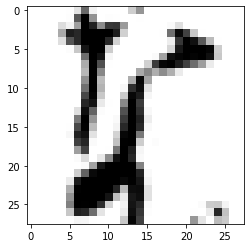

LABEL: 4

 
 LR wrong classified (equal wrong label)

INPUT:


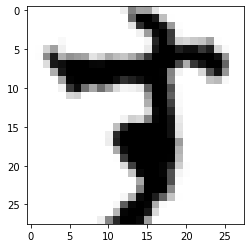

LABEL: 2


In [20]:
LR_prediction = learn_model.predict(X_test)
SVM_prediction = clf.predict(X_test)


for i in range(len(X_test)):
    if (y_test[i] != LR_prediction[i] and y_test[i] == SVM_prediction[i]):
        missclass_index=i
        break
        
print("SVM correctly classified")       
plot_input(X_test,y_test, missclass_index)

index_wrong = 0
for j in range(len(X_test)):
    if (LR_prediction[missclass_index] == y_test[j]):
        index_wrong=j
        break
        
print("\n \n LR wrong classified (equal wrong label)")
plot_input(X_test,y_test,index_wrong)


plt.show()
      

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay


# for better aligned printing of confusion matrix use floatmode='fixed'
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = sklearn.metrics.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5795 5803 5791 5833 5801 5808 5782 5798 5785 5804]

 Confusion matrix SVM  
 
 [[5013   29   13   95  109  196   12  160   43  125]
 [  20 4531  385   77  106   33  116    4  188  343]
 [   0  405 3795  177   65  106  791   12  371   69]
 [  10  150  127 4836   78  245   34   89  245   19]
 [ 193  383  441  163 4008   72  120   30  101  290]
 [  75  180  422  277   46 4620   58   23   87   20]
 [  15  425  724   72  127   71 4230   50   50   18]
 [  76   97  193  122  310  163   65 4606   85   81]
 [  51  537  342  199   19  313  266   16 3999   43]
 [  20  326  568   38  270   37   14   32  146 4353]]

 Confusion matrix SVM (normalized)   
 
 [[0.87 0.01 0.   0.02 0.02 0.03 0.   0.03 0.01 0.02]
 [0.   0.78 0.07 0.01 0.02 0.01 0.02 0.   0.03 0.06]
 [0.   0.07 0.66 0.03 0.01 0.02 0.14 0.   0.06 0.01]
 [0.   0.03 0.02 0.83 0.01 0.04 0.01 0.02 0.04 0.  ]
 [0.03 0.07 0.08 0.03 0.69 0.01 0.02 0.01 0.02 0.05]
 [0.01 0.03 0.07 0.05 0.01 0.8  0.01 0.   0.0

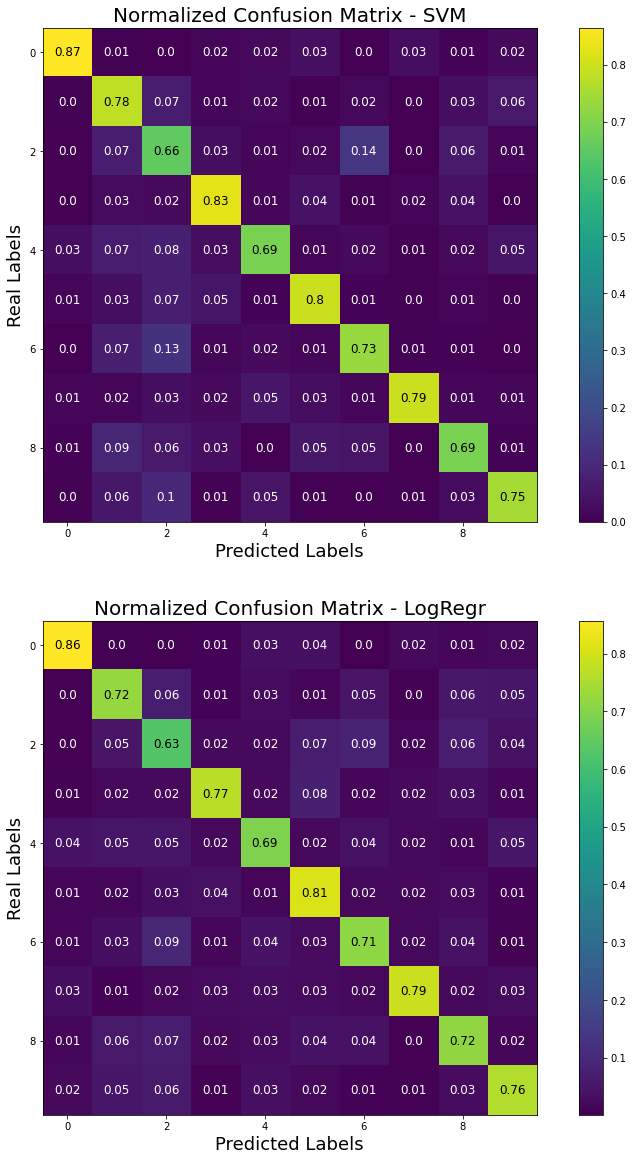

In [22]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

SVM_Norm_ConfusionMatrix = sklearn.metrics.confusion_matrix(y_test, SVM_prediction, normalize = 'true')

LR_Norm_ConfusionMatrix = sklearn.metrics.confusion_matrix(y_test, LR_prediction, normalize = 'true')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,20))


ax1.set_title('Normalized Confusion Matrix - SVM' , fontsize=20 )
ax1.set_xlabel('Predicted Labels', fontsize=18)
ax1.set_ylabel('Real Labels', fontsize=18)
plot1=ax1.imshow(SVM_Norm_ConfusionMatrix)
for i in range(confusion_SVM.shape[0]):
    for j in range(confusion_SVM.shape[1]):
        n = round(SVM_Norm_ConfusionMatrix[j,i],2)
        if (i == j):
            ax1.text(i,j, str(n), va = 'center' , ha = 'center', color='black', fontsize=12)
        else:
            ax1.text(i,j, str(n), va = 'center' , ha = 'center', color='white', fontsize=12)
plt.colorbar(plot1 , ax=ax1)       




ax2.set_title('Normalized Confusion Matrix - LogRegr' , fontsize=20)
ax2.set_xlabel('Predicted Labels' , fontsize=18)
ax2.set_ylabel('Real Labels' , fontsize=18)
plot2=ax2.imshow(LR_Norm_ConfusionMatrix)
for i in range(confusion_LR.shape[0]):
    for j in range(confusion_LR.shape[1]):
        n = round(LR_Norm_ConfusionMatrix[j,i],2)
        if (i == j):
            ax2.text(i,j, str(n), va = 'center' , ha = 'center', color='black' , fontsize=12)
        else:
            ax2.text(i,j, str(n), va = 'center' , ha = 'center', color="white", fontsize=12)
plt.colorbar(plot2, ax=ax2)       

            
plt.show()




## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Each column of the confusion matrix represents the predicted values and each row represents the real labels, from the diagonal of the matrices (where are shown the correct classifications) I can see that the accuracy of the classification is varying between japanese characters. 


Some classes have lower accuracies and others have an higher one and these differences might can be related to the similarities between Hiragana characters, for example label 2 and label 6 (of the initial table) are really similar and this may correspond to a difficult by the algorithm in the correct classification and as a consequence, having a decrease in accuracy.
This is also visible in the confusion matrixes, for example the row real label = 2 have predicted label = 6 as the second biggest number of the entire row (0.14).
It means that the SVM predictor when it badly classifies the label 2, most of the times it confuses it with label 6.
